In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the datasets
merged_df = pd.read_csv("C:\\Users\\simon\\OneDrive\\Dokumente unsortiert\\MSBA - ICL London\\2 Elective Modules\\Data Analytics and Visualisation for Business\\Group Assignment 1\\archive\\Merged_Customer_Churn_Dataset.csv")

In [3]:
# Dropping rows where there is no result for 'Churn'
merged_df = merged_df.dropna(subset=['Churn'])

# Correctly encode 'Subscription Type' based on natural order: Basic < Standard < Premium
subscription_mapping = {'Basic': 0, 'Standard': 1, 'Premium': 2}
merged_df['Subscription Type'] = merged_df['Subscription Type'].map(subscription_mapping)

# Correctly encode 'Contract Length' based on natural order: Annual < Monthly < Quarterly
contract_length_mapping = {'Annual': 0, 'Monthly': 1, 'Quarterly': 2}
merged_df['Contract Length'] = merged_df['Contract Length'].map(contract_length_mapping)

# Encoding 'Gender' using manual binary mapping (since it's categorical and binary)
gender_mapping = {'Female': 0, 'Male': 1}
merged_df['Gender'] = merged_df['Gender'].map(gender_mapping)

# Defining the features and target variable for the training set
X_variables = merged_df.drop(columns=['CustomerID', 'Churn'])

# Ensuring 'Churn' is treated as an integer (binary)
y_variables = merged_df['Churn'].astype(int)

In [4]:
# Adding a constant to the model (intercept)
X_variables = sm.add_constant(X_variables)

# Fitting the logistic regression model
logit_model = sm.Logit(y_variables, X_variables)
result = logit_model.fit()

# Displaying the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.425363
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               505206
Model:                          Logit   Df Residuals:                   505195
Method:                           MLE   Df Model:                           10
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.3809
Time:                        22:18:13   Log-Likelihood:            -2.1490e+05
converged:                       True   LL-Null:                   -3.4710e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9568      0.023    -41.666      0.000      -1.002      -0.912
Age     

In [5]:
# Extracting logistic regression results from the fitted model
coefs = result.params
std_errs = result.bse
z_values = result.tvalues
p_values = result.pvalues
conf_int = result.conf_int()

# Creating a DataFrame for all extracted values
logit_results_df = pd.DataFrame({
    'Variable': coefs.index,
    'Coefficient': coefs.values,
    'Std Error': std_errs.values,
    'z-value': z_values.values,
    'P>|z|': p_values.values,
    'Conf Int Low': conf_int[0].values,
    'Conf Int High': conf_int[1].values
})

# Saving the DataFrame to a CSV file
logit_results_df.to_csv('logit_regression_results.csv', index=False)

print("Logistic regression results saved to 'logit_regression_results.csv'")

Logistic regression results saved to 'logit_regression_results.csv'


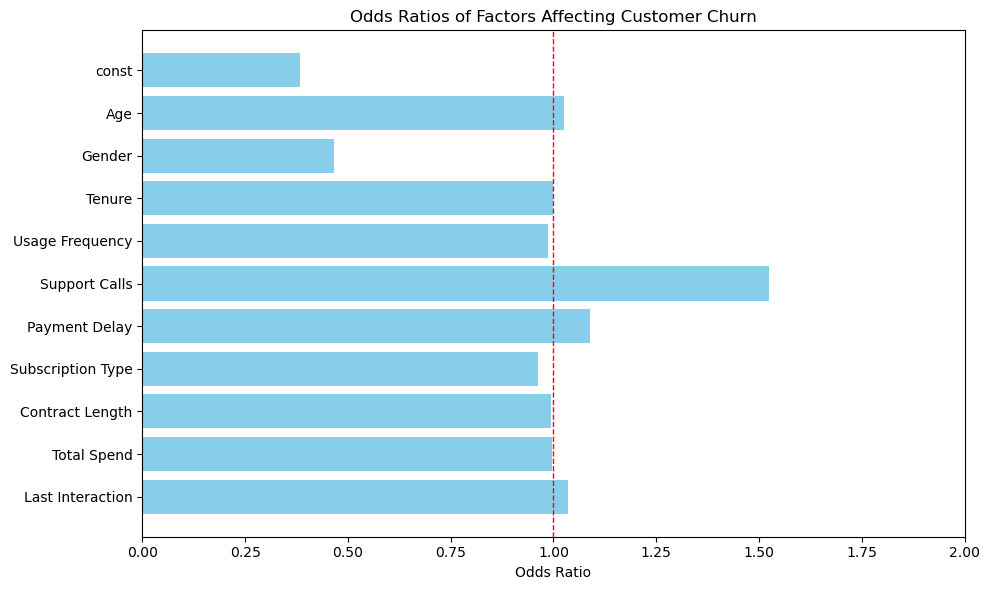

In [6]:
# Creating a bar plot for the odds ratios extracted from the logistic regression results
plt.figure(figsize=(10, 6))

# Plotting the odds ratios for each variable
plt.barh(logit_results_df['Variable'], np.exp(logit_results_df['Coefficient']), color='skyblue')

# Adding labels and title
plt.xlabel('Odds Ratio')
plt.title('Odds Ratios of Factors Affecting Customer Churn')

# Setting the x-axis limits to go from 0 to 2
plt.xlim(0, 2)

# Adding a reference line at Odds Ratio = 1
plt.axvline(x=1, color='red', linestyle='--', linewidth=1)

# Inverting y-axis to match original order for easier interpretation
plt.gca().invert_yaxis()

# Adjusting layout for better readability
plt.tight_layout()

# Saving the figure as a PNG file
plt.savefig('odds_ratios_factors_customer_churn.png', format='png', dpi=300)

# Displaying the plot
plt.show()

In [7]:
# Extracting the coefficients from the logistic regression results
coefficients = result.params

# Calculating odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Creating a DataFrame for the odds ratios
odds_ratios_df = pd.DataFrame({
    'Variable': odds_ratios.index,
    'Odds Ratio': odds_ratios.values
})

# Saving the odds ratios DataFrame to a CSV file
odds_ratios_df.to_csv('logit_odds_ratios.csv', index=False)

print("Odds ratios saved to 'logit_odds_ratios.csv'")

Odds ratios saved to 'logit_odds_ratios.csv'


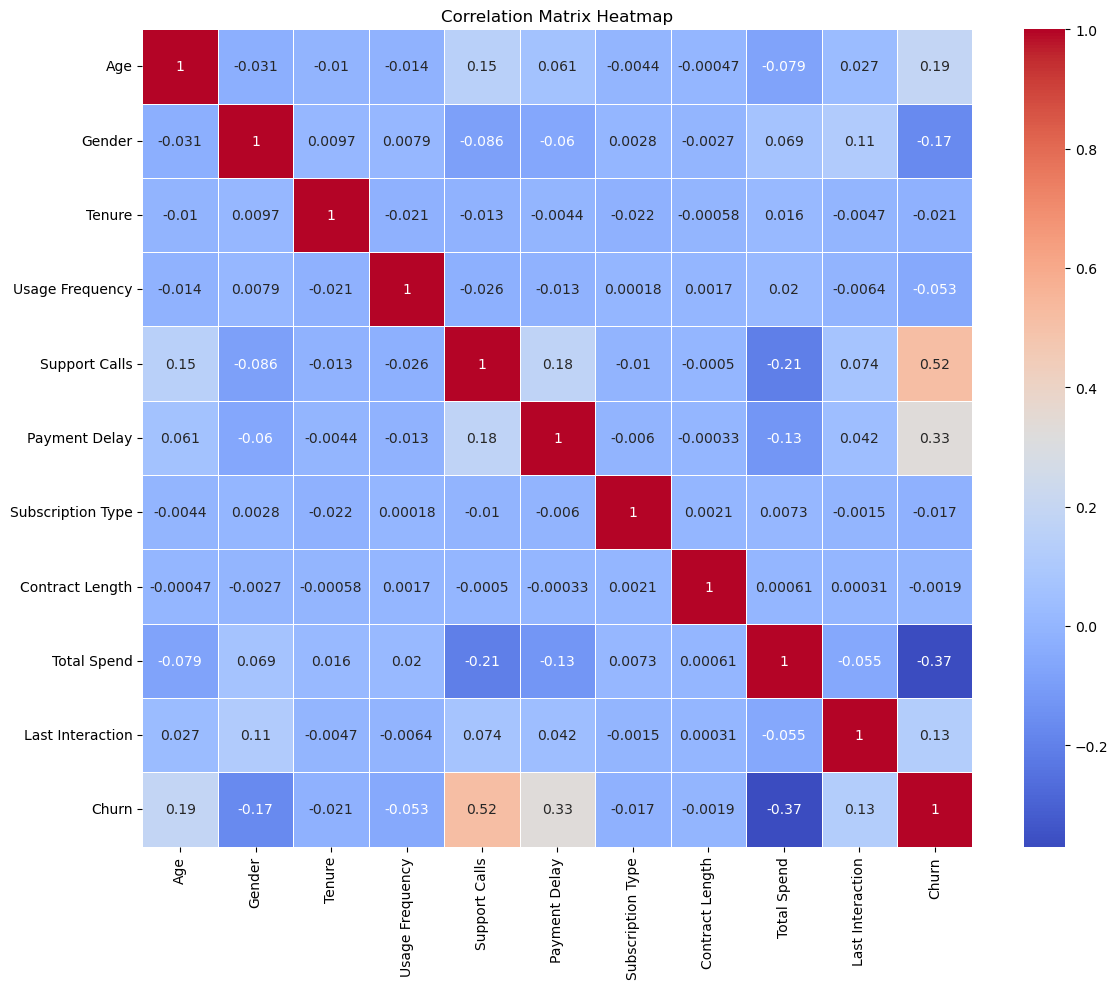

In [8]:
# Dropping unnecessary columns ('CustomerID' and 'Churn')
features_for_correlation = merged_df.drop(columns=['CustomerID'])

# Calculating the correlation matrix (including 'Churn' for meaningful analysis with other features)
correlation_matrix = features_for_correlation.corr()

# Step 2: Plotting the Correlation Matrix
plt.figure(figsize=(12, 10))

# Plotting the Correlation Matrix Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')

# Adjusting the layout for better visualization
plt.tight_layout()

# Saving the figure as a PNG file
plt.savefig('correlation_study.png', format='png', dpi=300)

# Displaying the plot
plt.show()